In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# read in data
df = pd.read_csv('fedfunds.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.astype(float)
df

,ffr,change,scheduled
1989-06-05,9.50,-25.0,0.0
1989-07-07,9.25,-25.0,1.0
1989-07-26,9.00,-25.0,0.0
1989-08-23,9.00,0.0,1.0
1989-10-04,9.00,0.0,1.0
...,...,...,...
2023-05-03,5.15,25.0,1.0
2023-06-14,5.15,0.0,1.0
2023-07-26,5.40,25.0,1.0
2023-09-20,5.40,0.0,1.0


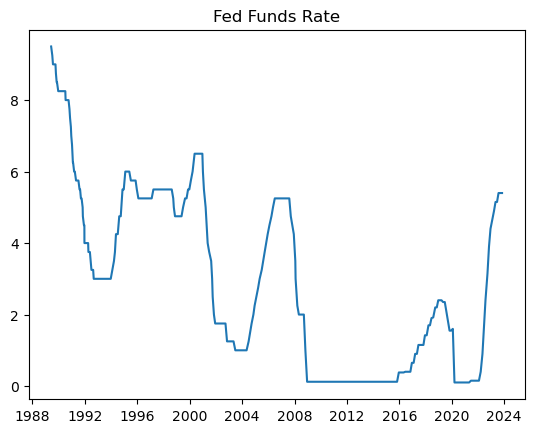

In [12]:
# visualize ffr
plt.title('Fed Funds Rate')
plt.plot(df.index, df['ffr'])
plt.show()

In [13]:
# make df for scheduled and unscheduled
dfs, dfu = df.query('scheduled == 1'), df.query('scheduled == 0')

In [14]:
# unscheduled comparison
n_dfu = len(dfu)
down_dfu = len(dfu.query('change < 0'))
up_dfu = len(dfu.query('change > 0'))
const_dfu = len(dfu.query('change == 0'))

# print results
print(f'Number of unscheduled meetings: \t{n_dfu}')
print(f'Number of meetings with no change: \t{const_dfu}')
print(f'Number of meetings with a change: \t{down_dfu + up_dfu}')
print(f'\t(Up: {up_dfu} \tDown: {down_dfu})')

Number of unscheduled meetings: 	25
Number of meetings with no change: 	0
Number of meetings with a change: 	25
	(Up: 1 	Down: 24)


In [15]:
# scheduled comparison
n_dfs = len(dfs)
down_dfs = len(dfs.query('change < 0'))
up_dfs = len(dfs.query('change > 0'))
const_dfs = len(dfs.query('change == 0'))

# print results
print(f'Number of unscheduled meetings: \t{n_dfs}')
print(f'Number of meetings with no change: \t{const_dfs}')
print(f'Percent of meetings with no change: \t{round(const_dfs / n_dfs, 2)}')
print(f'Number of meetings with a change: \t{down_dfs + up_dfs}')
print(f'\t(Up: {up_dfs} Down: {down_dfs})')

Number of unscheduled meetings: 	276
Number of meetings with no change: 	189
Percent of meetings with no change: 	0.68
Number of meetings with a change: 	87
	(Up: 53 Down: 34)
